# Visualización del archivo de coupling 

 Extraído de: "Relation Between Oceanic Plate Structure, Patterns of Interplate Locking and Microseismicity in the 1922 Atacama Seismic Gap" D. Gonzalez Vidal, et al. 2023

In [3]:
"""
Coupling figure - 2D Fault 
========================================================================
    Draw a GmtrFigure for the given lock model .
    """
import pygmt
import numpy as np
import geostochpy
import rockhound as rh
file_trench=geostochpy.get_data('trench-chile.txt')
trench = np.genfromtxt( file_trench, delimiter = " " )
lonfosa = trench[:,0]
latfosa = trench[:,1]
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
mesh1[0,0]-mesh1[1,0]
#
grid=pygmt.xyz2grd(x=mesh1[:,0],y=mesh1[:,1],z=median_lock,region=region,spacing='0.1')
grid=pygmt.grdsample(grid=grid,region=region,spacing='0.005',outgrid='coupling.grd')
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='grayC',shading=True)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"],)
cmap=pygmt.makecpt(cmap='hot',reverse=True,series=[0, 1, 0.1],continuous=False)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
fig.plot(x=[-77.6,-77.6],y=[-29,-36],fill='red',pen='2,red')
fig.text(x=-78,y=-32.5,text='Valparaíso 1730',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# valparaiso 1751
fig.plot(x=[-77,-77],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-77.3,y=-36,text='Concepción 1751',fill='white',font="10p,Helvetica-Bold,black",angle=90)

# valparaiso 1985,1906,1822
fig.plot(x=[-76,-76],y=[-32.5,-34.5],fill='red',pen='2,red')
fig.text(x=-76.5,y=-33.5,text='Valparaiso 1822,1906,1985',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Illapel 2015,1943,1880
fig.plot(x=[-75,-75],y=[-30,-31.6],fill='red',pen='2,red')
fig.text(x=-75.5,y=-31,text='Illapel 1880,1943,2015',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Talca 1928
fig.plot(x=[-74,-74],y=[-34.3,-35.5],fill='red',pen='2,red')
fig.text(x=-74.5,y=-35,text='Talca 1928',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Atacama 1922
fig.plot(x=[-74,-74],y=[-28,-30],fill='red',pen='2,red')
fig.text(x=-74.5,y=-29,text='Atacama 1922',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Maule 2010
fig.plot(x=[-75,-75],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-75.5,y=-36,text='Maule 2010',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Concepcion 1835
fig.plot(x=[-76,-76],y=[-35.2,-37.8],fill='red',pen='2,red')
fig.text(x=-76.5,y=-37,text='Concepción 1835',fill='white',font="10p,Helvetica-Bold,black",angle=90)

##
fig.grdimage(grid=grid,cmap=cmap,nan_transparent=True)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="2p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lLocking degree"],
)
#cities
#valparaiso
fig.text(x=-71.3,y= -33.03,text='Valparaíso',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.63,y=-33.03,style='c0.2c',fill='white',pen="1p,black")
# la serena
fig.text(x=-71.2,y= -30.03,text='La Serena',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.4,y=-30.03,style='c0.2c',fill='white',pen="1p,black")
#santiago
fig.text(x=-70.4,y= -33.45,text='Santiago',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-70.6,y=-33.45,style='c0.2c',fill='white',pen="1p,black")
# talca
fig.text(x=-71.6,y= -35.43,text='Talca',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.8,y=-35.43,style='c0.2c',fill='white',pen="1p,black")
# concepcion
fig.text(x=-72.8,y= -36.812,text='Concepción',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-73.039,y=-36.812,style='c0.2c',fill='white',pen="1p,black")

fig.show()
fig.savefig('Coupling.png')


GMTInvalidInput: No input data provided.

-0.015999999999991132

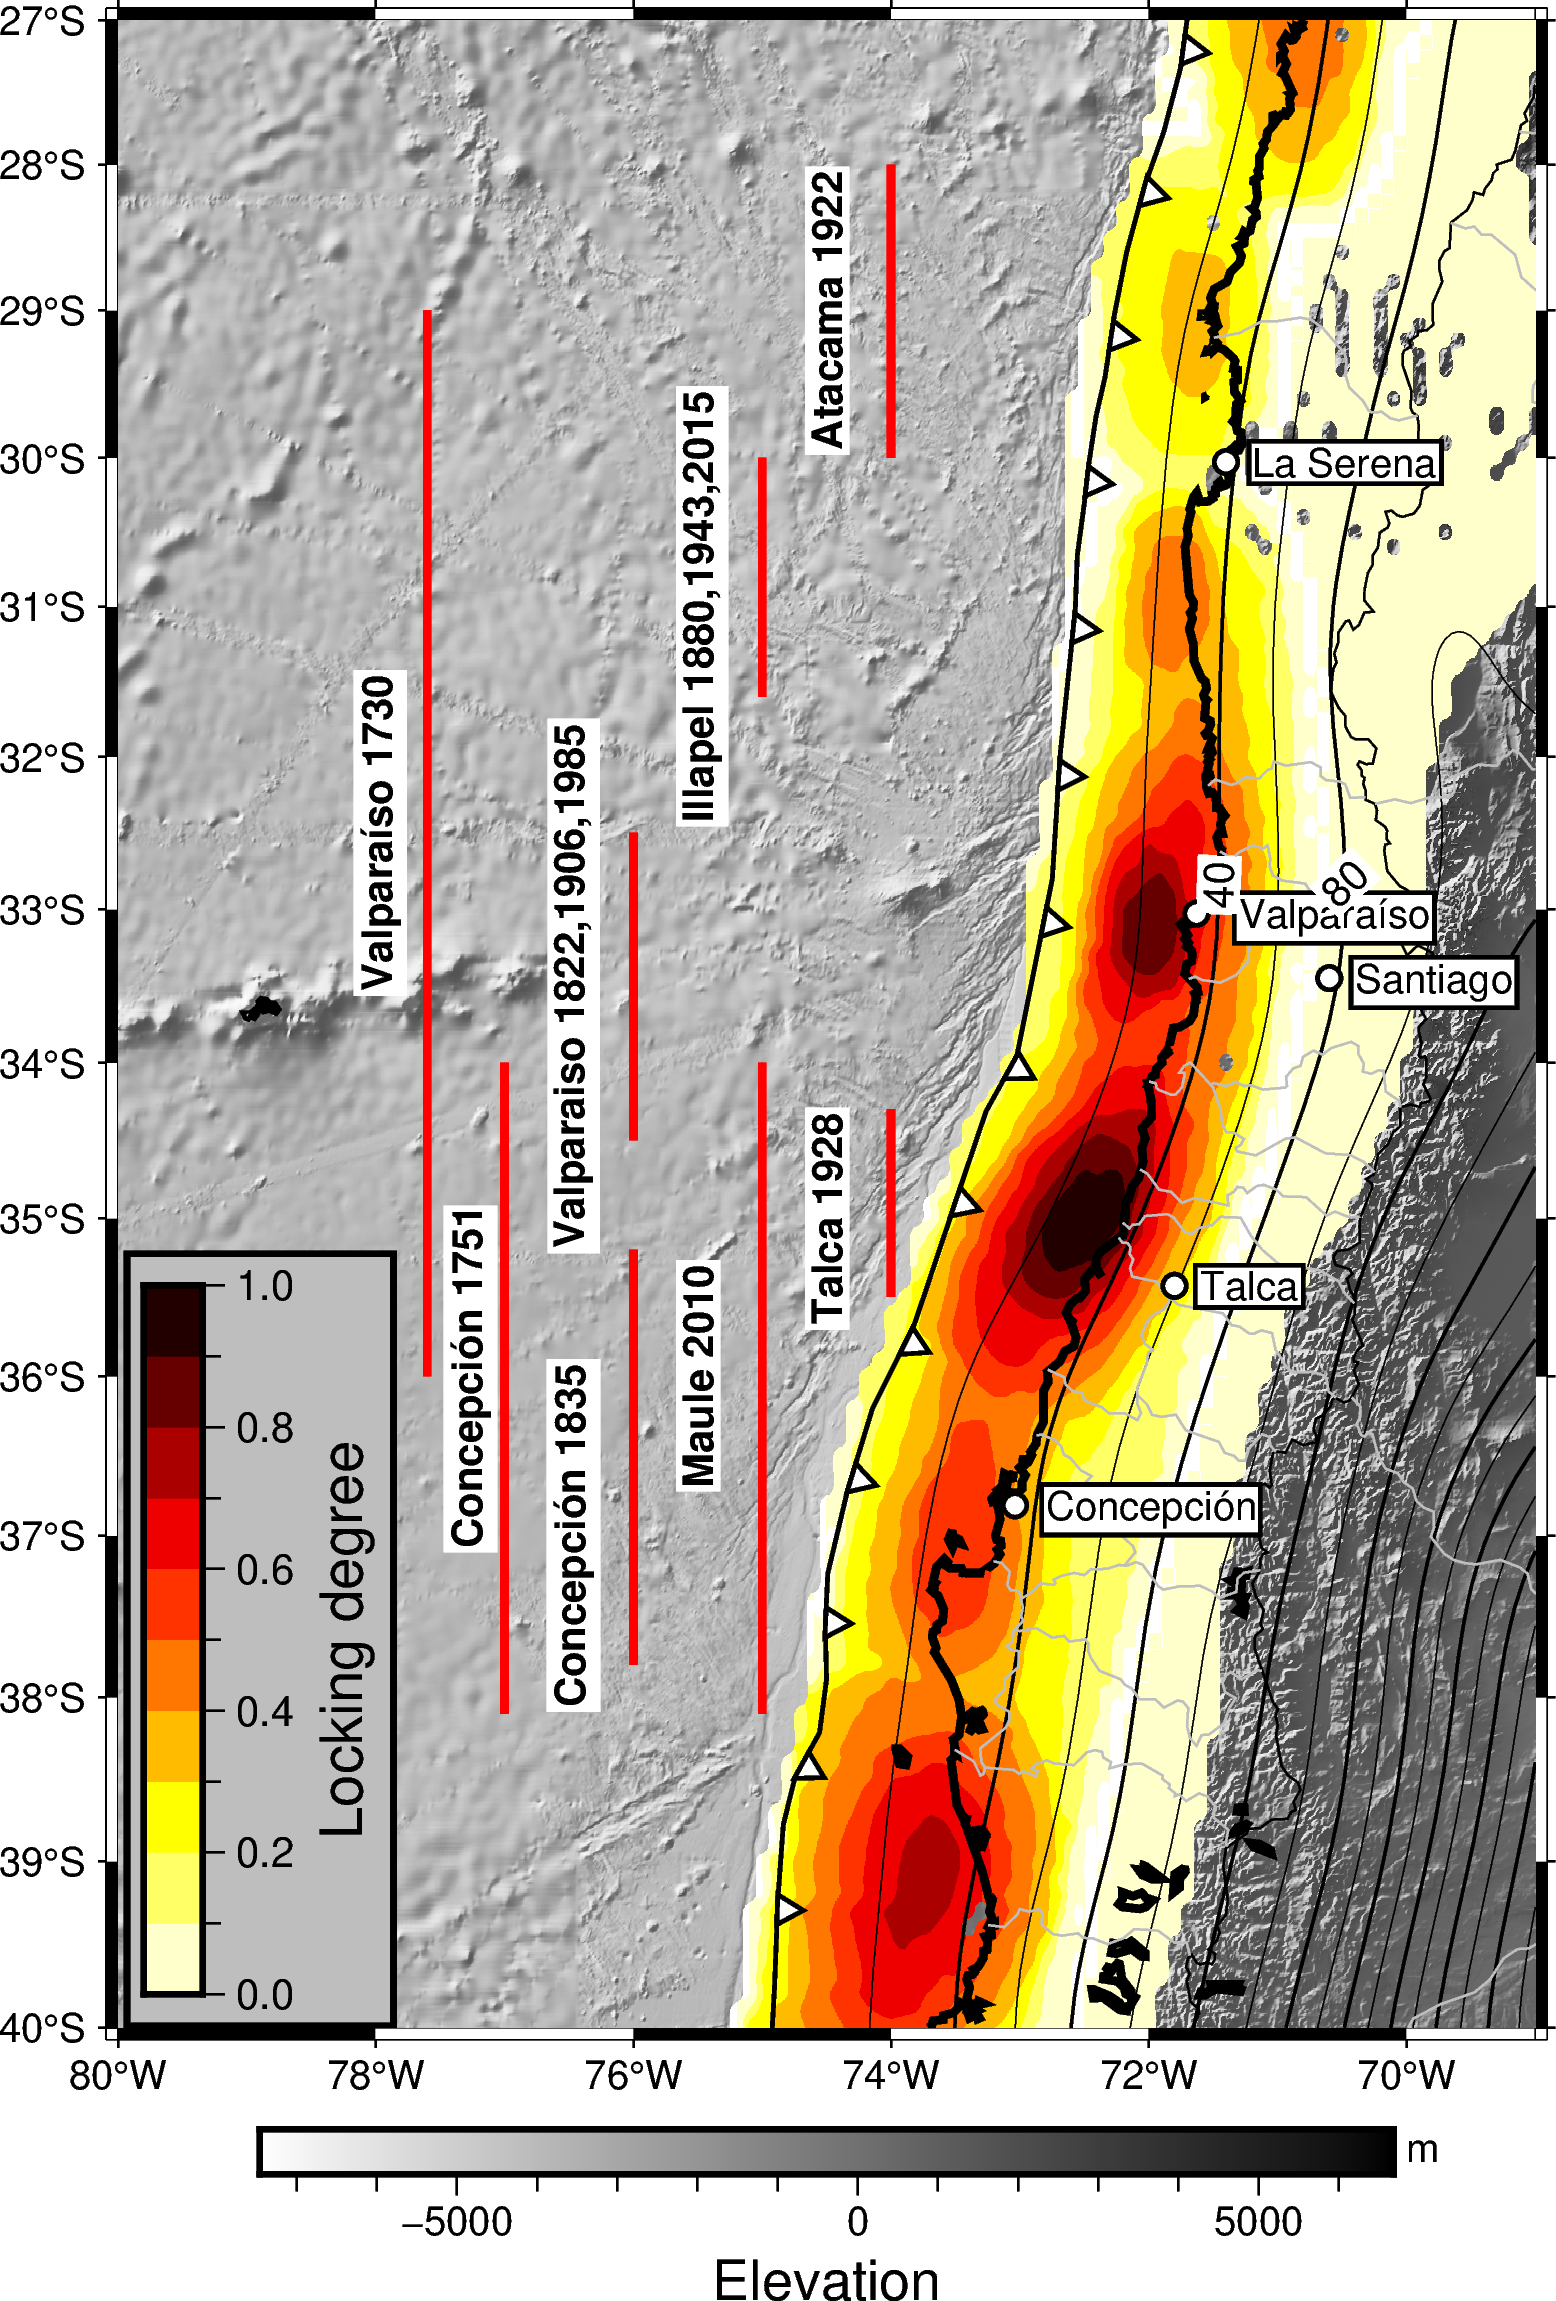

In [57]:
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
mesh1[0,0]-mesh1[1,0]
#
grid=pygmt.xyz2grd(x=mesh1[:,0],y=mesh1[:,1],z=median_lock,region=region,spacing='0.1')
grid=pygmt.grdsample(grid=grid,region=region,spacing='0.005')
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='grayC',shading=True)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"],)
cmap=pygmt.makecpt(cmap='hot',reverse=True,series=[0, 1, 0.1],continuous=False)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
fig.plot(x=[-77.6,-77.6],y=[-29,-36],fill='red',pen='2,red')
fig.text(x=-78,y=-32.5,text='Valparaíso 1730',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# valparaiso 1751
fig.plot(x=[-77,-77],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-77.3,y=-36,text='Concepción 1751',fill='white',font="10p,Helvetica-Bold,black",angle=90)

# valparaiso 1985,1906,1822
fig.plot(x=[-76,-76],y=[-32.5,-34.5],fill='red',pen='2,red')
fig.text(x=-76.5,y=-33.5,text='Valparaiso 1822,1906,1985',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Illapel 2015,1943,1880
fig.plot(x=[-75,-75],y=[-30,-31.6],fill='red',pen='2,red')
fig.text(x=-75.5,y=-31,text='Illapel 1880,1943,2015',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Talca 1928
fig.plot(x=[-74,-74],y=[-34.3,-35.5],fill='red',pen='2,red')
fig.text(x=-74.5,y=-35,text='Talca 1928',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Atacama 1922
fig.plot(x=[-74,-74],y=[-28,-30],fill='red',pen='2,red')
fig.text(x=-74.5,y=-29,text='Atacama 1922',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Maule 2010
fig.plot(x=[-75,-75],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-75.5,y=-36,text='Maule 2010',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Concepcion 1835
fig.plot(x=[-76,-76],y=[-35.2,-37.8],fill='red',pen='2,red')
fig.text(x=-76.5,y=-37,text='Concepción 1835',fill='white',font="10p,Helvetica-Bold,black",angle=90)

##
fig.grdimage(grid=grid,cmap=cmap,nan_transparent=True)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="2p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lLocking degree"],
)
#cities
#valparaiso
fig.text(x=-71.3,y= -33.03,text='Valparaíso',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.63,y=-33.03,style='c0.2c',fill='white',pen="1p,black")
# la serena
fig.text(x=-71.2,y= -30.03,text='La Serena',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.4,y=-30.03,style='c0.2c',fill='white',pen="1p,black")
#santiago
fig.text(x=-70.4,y= -33.45,text='Santiago',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-70.6,y=-33.45,style='c0.2c',fill='white',pen="1p,black")
# talca
fig.text(x=-71.6,y= -35.43,text='Talca',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.8,y=-35.43,style='c0.2c',fill='white',pen="1p,black")
# concepcion
fig.text(x=-72.8,y= -36.812,text='Concepción',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-73.039,y=-36.812,style='c0.2c',fill='white',pen="1p,black")

fig.show()
fig.savefig('Coupling.png')
